In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.signal as signal

# Double Well Potential 

$ V(x,t) = V(x) - A_0 x \cos(2\pi f_0 t) $ 

$ V(x) = -\frac{1}{2}x^2 + \frac{1}{4}x^4 $

In [2]:
def Pot_and_Signal(a,b,A0,f0,t):
    xmin,xmax = -1.2*np.sqrt(a/b),1.2*np.sqrt(a/b)
    X = np.linspace(xmin,xmax,1000)
    Y = -a*X*X + b*X*X*X*X + A0*X*np.cos(2*np.pi*f0*t)
    return(X,Y)

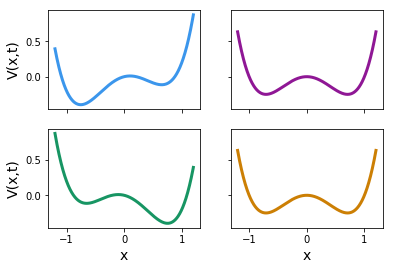

In [3]:
a = 1
b = 1
A0 = 0.2
f0 = 0.01
tau = 1.0/f0
tvals = [0,tau/4,tau/2,3*tau/4,tau]
fig,ax = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True)
Colors = ['#3B96EC','#8F1795','#179563','#CC7F04']
xm = np.sqrt(a/b)
for i in range(4):
    t = tvals[i]
    x,y = Pot_and_Signal(a,b,A0,f0,t)
    j,k = i//2,i%2
    ax[j,k].plot(x,y,color=Colors[i],lw=3)
    #ym_1 = Y = -a*xm*xm + b*xm*xm*xm*xm - A0*xm*np.cos(2*np.pi*f0*t)
    #ym_2 = Y = -a*xm*xm + b*xm*xm*xm*xm + A0*xm*np.cos(2*np.pi*f0*t)
    #ax[j,k].plot(-xm,ym_1,'o',color='r',markersize=10)
    #ax[j,k].plot(xm,ym_2,'o',color='b',markersize=10)
    
ax[1,0].set_xlabel('x',fontsize=14)
ax[1,1].set_xlabel('x',fontsize=14)
ax[0,0].set_ylabel('V(x,t)',fontsize=14)
ax[1,0].set_ylabel('V(x,t)',fontsize=14)
plt.show()    

# Solving a Stochastic ODE

$ \frac{dx}{dt} = -\frac{dV}{dx} + A_0 \cos(2\pi f_0 t) + \xi(t) $

$ <\xi(t)\xi(0)> = 2 D \delta(t) $

gaussian random variable with $\mu = 0$ and $\sigma^2 = 2D$


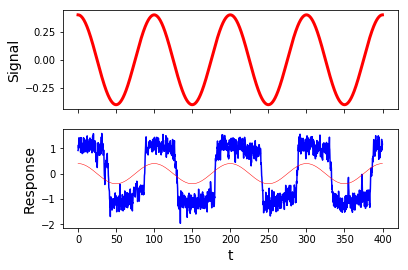

In [4]:
def Simulate(tmax,dt,a,b,phi,A0,D,f0,PS=False):
    t = np.arange(0,tmax,dt)
    x_in = np.random.rand()
    sigma = np.sqrt(2*D)
    sqrtdt = np.sqrt(dt)
    #======== Euler-Maruyama =======================#
    Y = np.zeros(len(t))
    Y[0] = x_in
    for i in range(1,len(t)):
        x = Y[i-1]
        dxdt = a*x - b*x*x*x + A0*np.cos(2*np.pi*f0*t[i] + phi)
        Y[i] = x + (dt * dxdt) + (sigma * sqrtdt * np.random.randn()) 
    #===============================================#
    if PS == True:
        fig,ax = plt.subplots(nrows=2,sharex=True)
        ax[0].plot(t,A0*np.cos(2*np.pi*f0*t),color='r',lw=3)
        ax[1].plot(t,Y,'b')
        ax[1].plot(t,A0*np.cos(2*np.pi*f0*t),color='r',lw=0.5)
        ax[1].set_xlabel('t',fontsize=14)
        ax[0].set_ylabel('Signal',fontsize=14)
        ax[1].set_ylabel('Response',fontsize=14)
        plt.show()
    return(t,Y)
#==============================================#
a = 1
b = 1
phi = 0
A0 = 0.4
D = 0.08
tmax = 400
f0 = 0.01
fs = 5.0
dt = 1.0/fs
#==============================================#
t,Y = Simulate(tmax,dt,a,b,phi,A0,D,f0,True)

# Binary Position

In [5]:
def Binary_Position(Y,t,a,b):
    xm = np.sqrt(a/b)
    d = np.zeros((2,len(t)))
    d[0,:] = (Y-xm)**2
    d[1,:] = (Y+xm)**2
    P = np.argmin(d,axis=0)
    return(P)
#===============================================#
def Resting_time_hist(Y,t,a,b,dt):
    P = Binary_Position(Y,t,a,b)
    transitions = np.nonzero(np.diff(P))
    switch_times = np.diff(transitions)*dt
    #===========================================#
    fig,ax = plt.subplots()
    Y,X = np.histogram(switch_times,bins=50,density=True)
    X = 0.5*(X[:-1]+X[1:])
    ax.bar(X,Y,width=0.7*X[1]-X[0],color='k')
    ax.set_xlabel(r'$\tau_{rest}$',fontsize=14)
    #ax.set_yscale('log')
    plt.show()
#================================================#
def Krameters_Rate(a,b,D):
    dV = a*a/(4*b)
    rK = (1.0/(np.sqrt(2)*np.pi))*np.exp(-dV/D)
    return(rK)
#================================================#


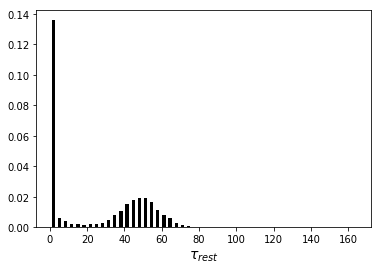

In [6]:
a = 1
b = 1
phi = 0
A0 = 0.4
D = 0.08
tmax = 400000
f0 = 0.01
fs = 5.0
dt = 1.0/fs
#==============================================#
t,Y = Simulate(tmax,dt,a,b,phi,A0,D,f0,False)
    
Resting_time_hist(Y,t,a,b,dt)

# Power Spectral Density

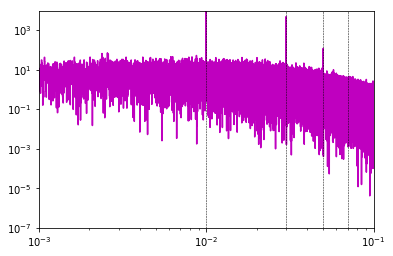

In [9]:
fs = 5.0
Freq,Power = signal.periodogram(Y,fs)
#==============================================#
fig,ax = plt.subplots()
ax.step(Freq,Power,color='m')
ax.axvline(f0,lw=0.5,linestyle='--',color='k')
ax.axvline(3*f0,lw=0.5,linestyle='--',color='k')
ax.axvline(5*f0,lw=0.5,linestyle='--',color='k')
ax.axvline(7*f0,lw=0.5,linestyle='--',color='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-7,1e4)
ax.set_xlim(f0/10,f0*10)
plt.show()

# PSD Peak vs D

Optimal value of D = 0.08


/home/kachandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/kachandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


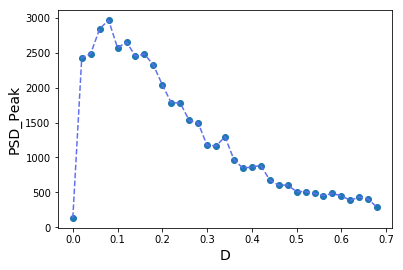

In [8]:
def Peak_vs_D(a,b,phi,A0,f0,dt,tmax):
    dV = a*a/(4*b)
    DVals = []
    fs = 1.0/dt
    Peaks = []
    D = 0.0
    dD = 0.02
    while True:
        t,Y = Simulate(tmax,dt,a,b,phi,A0,D,f0,False)
        if np.count_nonzero(np.isnan(Y)) == 0:
            Freq,Power = signal.periodogram(Y,fs)
            Peaks.append(np.max(Power))
            DVals.append(D)
            D += dD
        else:
            break
    
    print('Optimal value of D = '+str(DVals[np.argmax(Peaks)]))
    fig,ax = plt.subplots()
    ax.plot(DVals,Peaks,'o')
    ax.plot(DVals,Peaks,'--',color='#6170f0')
    ax.set_xlabel('D',fontsize=14)
    ax.set_ylabel('PSD_Peak',fontsize=14)
    plt.show()
#==============================================#
a = 1
b = 1
phi = 0
A0 = 0.4
tmax = 4000
f0 = 0.01
fs = 5.0
dt = 1.0/fs
#==============================================#
Peak_vs_D(a,b,phi,A0,f0,dt,tmax)
